# Importing Important Libraries


In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing
import librosa
import librosa.display
import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchaudio


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns




# Fetching the Data from the Dataset

In [2]:
folder = []
path = "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset"


languages = [folder for folder in os.listdir(path)
         if os.path.isdir(os.path.join(path, folder))]

print(languages)
    

['Punjabi', 'Tamil', 'Hindi', 'Bengali', 'Telugu', 'Kannada', 'Gujarati', 'Urdu', 'Marathi', 'Malayalam']


# Helper Functions to Load Audio, Extract MFCC and Plot MFCC

The Selected languages are Punjabi , Tamil and Hindi
Processing file: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/23694.mp3 from language: Punjabi


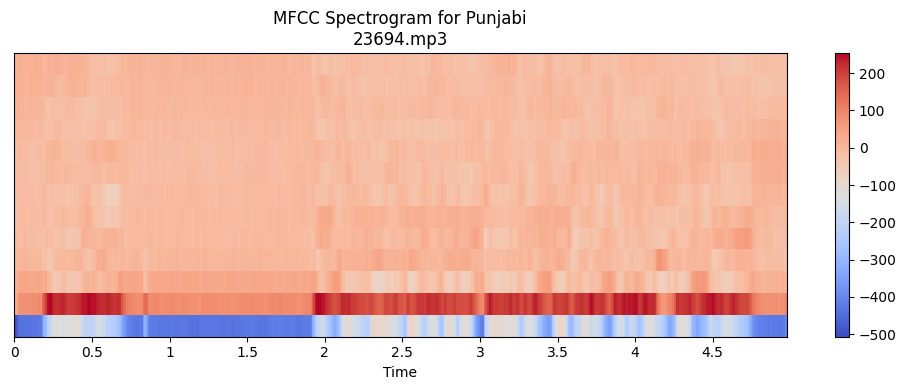

MFCC Mean for 23694.mp3 in Punjabi: [-2.6771732e+02  1.6454021e+02 -5.8256030e-02  1.9298705e+00
 -3.1625507e+00 -2.0275567e+00 -1.1649681e+01 -7.6667819e+00
 -5.5681448e+00 -1.2108624e+01 -6.8646393e+00 -6.1368380e+00
 -6.9232697e+00]
MFCC Variance for 23694.mp3 in Punjabi: [15666.903    3758.6926   1346.5714    259.46628   319.24417   227.0173
   187.58264   130.0688    119.4467    104.98439    95.02702   143.64694
   206.93744]

Processing file: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/13738.mp3 from language: Punjabi


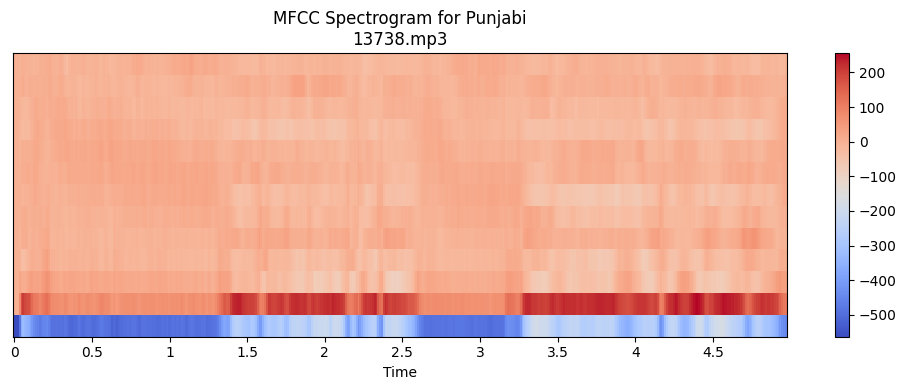

MFCC Mean for 13738.mp3 in Punjabi: [-360.5442     150.30353    -10.860294   -17.395592     4.297054
   -5.595799   -14.389801     5.589024     1.4293517  -19.353907
   -9.349617     1.4405833   -5.6731124]
MFCC Variance for 13738.mp3 in Punjabi: [12559.396     4470.5464    1229.6193     333.7745     215.80234
   245.87657    651.8025     180.04582    168.31541    390.3189
   101.49497    117.133156   136.87099 ]

Processing file: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/13802.mp3 from language: Punjabi


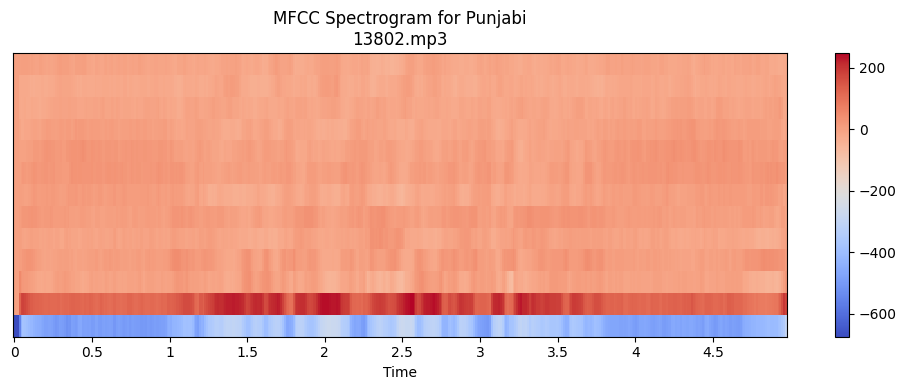

MFCC Mean for 13802.mp3 in Punjabi: [-414.18582    152.97377     -6.9935827    8.095957    -7.0265927
    9.943141    -5.6278305   11.943693     7.390131    -5.078749
  -10.34546    -18.746426   -12.018971 ]
MFCC Variance for 13802.mp3 in Punjabi: [5194.346    1980.6256    352.6231    228.40123   184.68527   144.66673
  289.3589    180.95808   230.64223   171.70627    59.675808   97.22453
  106.244446]

Processing file: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Tamil/23694.mp3 from language: Tamil


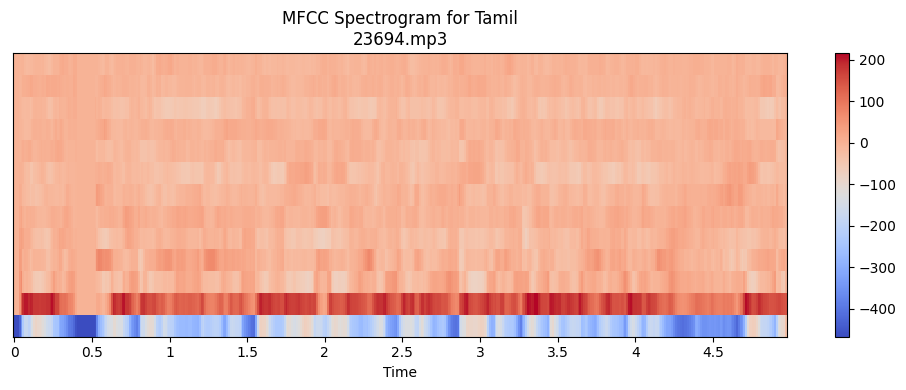

MFCC Mean for 23694.mp3 in Tamil: [-231.35078    137.35316     -5.1823516    5.330942   -12.321902
    4.714541    -5.187646   -16.172651    -6.700432    -0.5357831
  -22.033548    -0.9064989   -2.1081429]
MFCC Variance for 23694.mp3 in Tamil: [9951.788    2451.2524    878.6123    618.48126   407.43396   141.7962
  203.81212   435.08475   165.23193   104.22316   264.52844    71.443886
   60.913593]

Processing file: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Tamil/13738.mp3 from language: Tamil


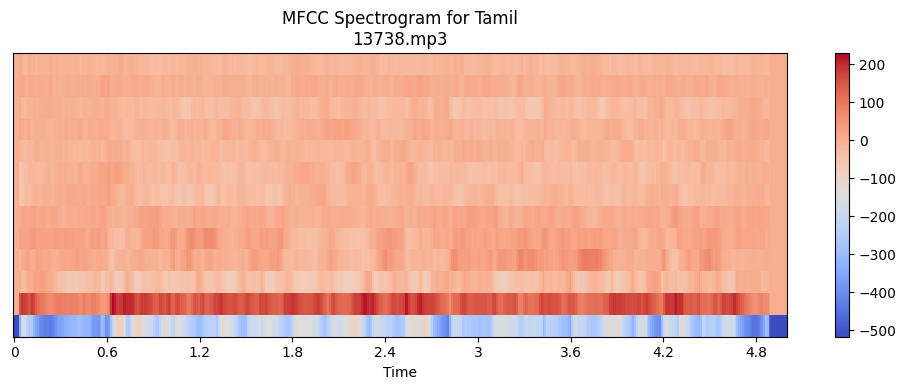

MFCC Mean for 13738.mp3 in Tamil: [-242.95483    138.18704    -30.779514    11.351395    13.483302
    8.643803   -18.167791   -18.436377   -12.141154    -5.4410014
  -21.462774     2.3665984  -14.714699 ]
MFCC Variance for 13738.mp3 in Tamil: [8845.457   1893.4893   752.7709   720.97516  532.2126   121.51985
  333.9954   297.31244  132.13657  156.25648  267.6644    65.64532
   78.49137]

Processing file: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Tamil/13802.mp3 from language: Tamil


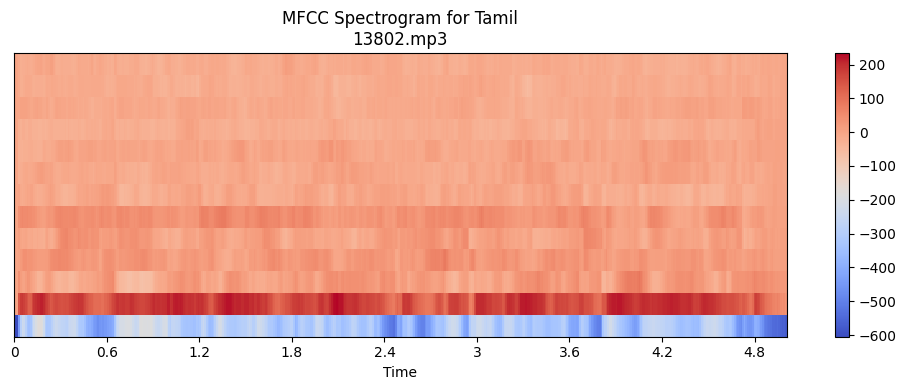

MFCC Mean for 13802.mp3 in Tamil: [-3.2873651e+02  1.6739546e+02  1.2681522e+01  2.6076546e+01
  9.8135138e+00  3.6921829e+01 -9.7950516e+00 -5.1339922e+00
  2.8081757e-01 -1.9544132e+01 -8.1225090e+00 -1.5768603e+01
 -1.5553648e+01]
MFCC Variance for 13802.mp3 in Tamil: [7131.068    1573.5591    928.42883   256.6842    448.1194    397.94162
  245.67244   158.48387   146.04196   114.368034   98.02024    89.4411
   77.09621 ]

Processing file: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Hindi/23694.mp3 from language: Hindi


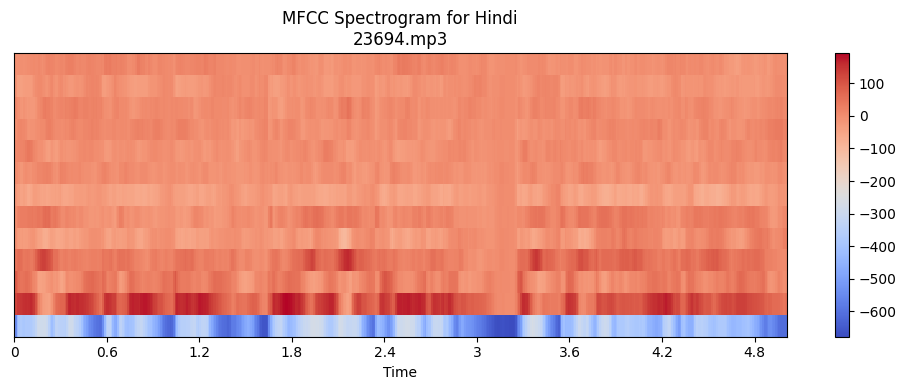

MFCC Mean for 23694.mp3 in Hindi: [-431.18857    103.28736     19.097527    46.882812   -15.276834
   13.807842   -38.579163    -3.2637632   -3.2501051    3.1237495
    4.2819924  -11.83679      3.1208096]
MFCC Variance for 23694.mp3 in Hindi: [11837.737    2783.4297    906.0704   1089.506     702.97723   513.74365
   324.35114   137.60374   190.705     163.7397    167.78468   207.41634
   179.77927]

Processing file: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Hindi/13738.mp3 from language: Hindi


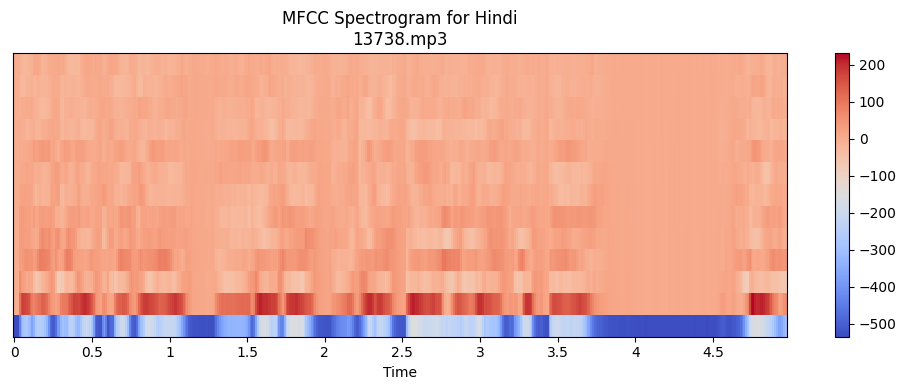

MFCC Mean for 13738.mp3 in Hindi: [-3.6304807e+02  9.4755684e+01 -4.7246795e+00  3.0292509e+01
  9.7876558e+00  1.5891130e+01  2.8271866e+00  2.0702145e+00
  1.3110372e+01 -4.7320600e+00 -3.1084320e-01 -1.2016908e+00
 -1.1680371e+00]
MFCC Variance for 13738.mp3 in Hindi: [17443.303    4729.7866    847.6121    614.2628    574.7774    355.66058
   228.05136   210.81711   154.92938   175.24542   113.66022   100.12285
    72.30498]

Processing file: /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Hindi/13802.mp3 from language: Hindi


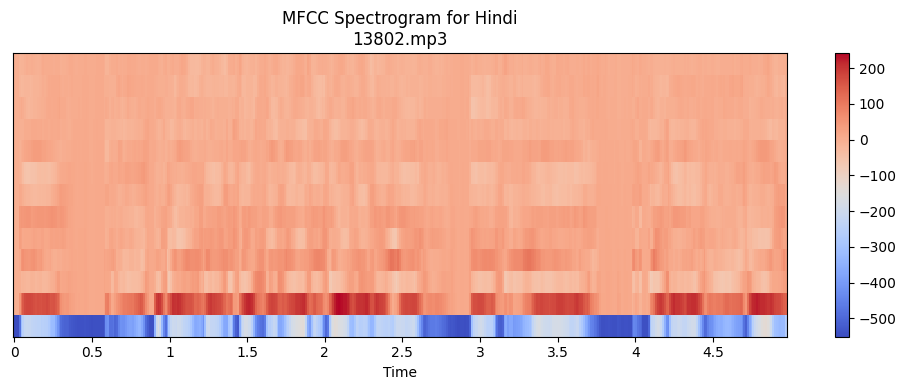

MFCC Mean for 13802.mp3 in Hindi: [-3.4144479e+02  1.2179540e+02 -6.5396857e+00  2.9700775e+01
  1.2526325e+01  1.8175425e+01 -2.1781912e+00 -4.5521317e+00
  1.3327595e+01 -2.6197069e+00 -3.4727594e-01 -1.6563507e+00
  2.9008168e-01]
MFCC Variance for 13802.mp3 in Hindi: [16364.396    4739.23      954.05383   839.3412    508.8892    336.13458
   286.96317   405.88275   128.09741   129.09169   121.71679   138.40056
    73.16855]



In [3]:
selected_langs = languages[:3]
print(f"The Selected languages are {selected_langs[0]} , {selected_langs[1]} and {selected_langs[2]}")

def load_audio_file(file_path):
    """
    Load an audio file using librosa.
    """
    try:
        y, sr = librosa.load(file_path, sr=None)
        return y, sr
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None, None

def extract_mfcc(y, sr, n_mfcc=13):
    """
    Extract MFCC features from the audio signal.
    """
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs

def plot_mfcc(mfccs, sr, lang, file_path):
    """
    Plot the MFCC spectrogram.
    """
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCC Spectrogram for {lang}\n{os.path.basename(file_path)}')
    plt.tight_layout()
    plt.show()

def compute_statistics(mfccs):
    """
    Compute the mean and variance of MFCC coefficients along the time axis.
    """
    mfcc_mean = np.mean(mfccs, axis=1)
    mfcc_var = np.var(mfccs, axis=1)
    return mfcc_mean, mfcc_var

for lang in selected_langs:
    folder_path = os.path.join(path, lang)
    audio_files = [os.path.join(folder_path, f) 
                   for f in os.listdir(folder_path) 
                   if f.lower().endswith(('.wav', '.mp3', '.flac'))]
    
    if not audio_files:
        print(f"No audio files found in {lang} folder.")
        continue
    
    for i in range(min(3, len(audio_files))):
        sample_file = audio_files[i]
        print(f"Processing file: {sample_file} from language: {lang}")
        
        # Load the audio file
        y, sr = load_audio_file(sample_file)
        if y is None:
            continue
    
        # Extract MFCC features
        mfccs = extract_mfcc(y, sr, n_mfcc=13)
        
        # Visualize the MFCC spectrogram
        plot_mfcc(mfccs, sr, lang, sample_file)
        
        # Compute and print the statistics of the MFCC coefficients
        mfcc_mean, mfcc_var = compute_statistics(mfccs)
        print(f"MFCC Mean for {os.path.basename(sample_file)} in {lang}: {mfcc_mean}")
        print(f"MFCC Variance for {os.path.basename(sample_file)} in {lang}: {mfcc_var}\n")


# Creating Custom Dataset(as defined by Pytorch) with Helper Function to Normalize the Data

In [5]:
class NormalizeNFCC:
    def __call__(self, mfcc):
        mean = np.mean(mfcc, axis=1, keepdims=True)
        std = np.std(mfcc, axis=1, keepdims=True)
        normalized_mfcc = (mfcc-mean)/(std+1e-9)
        return normalized_mfcc

class audio_dataset(Dataset):
    def __init__(self, path, n_mfcc=13, transform=None, target_transform=None):
        self.path = path
        self.n_mfcc = n_mfcc
        self.transform = transform
        self.languages = sorted([folder for folder in os.listdir(path)
                                 if os.path.isdir(os.path.join(path, folder))])
        self.label_idx = {lang: idx for idx, lang in enumerate(self.languages)}
        self.samples = []
        for lang in self.languages:
            lang_folder = os.path.join(path, lang)
            files = sorted(os.listdir(lang_folder))
            count = 0
            for file in files:
                if file.lower().endswith(('.wav', '.mp3')):
                    if count >= 11000:
                        break
                    file_path = os.path.join(lang_folder, file)
                    self.samples.append((file_path, self.label_idx[lang]))
                    count += 1

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        file_path, label = self.samples[idx]
        try:
            y, sr = librosa.load(file_path, sr=None)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
            return self.__getitem__((idx + 1) % len(self.samples))
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=self.n_mfcc)
        if self.transform:
            mfcc = self.transform(mfcc)
        mfcc_tensor = torch.tensor(mfcc, dtype=torch.float)
        return mfcc_tensor, label
        

# Splitting the Dataset into Training, Testing and Validation Sets

In [6]:
def cus_collate(batch):
    mfccs = [item[0] for item in batch]
    labels = torch.tensor([item[1] for item in batch], dtype=torch.long)
    mfccs_t = [mfcc.T for mfcc in mfccs]
    padded_mfccs = pad_sequence(mfccs_t, batch_first=True)
    padded_mfccs = padded_mfccs.transpose(1, 2)
    return padded_mfccs, labels

path = "/kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset"
n_mfcc = 13
transform = NormalizeNFCC()

dataset = audio_dataset(path = path, n_mfcc=n_mfcc, transform=transform)

total_samples = len(dataset)
train_size = int(0.7*total_samples)
val_size = int(0.15*total_samples)
test_size = total_samples - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=cus_collate)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=cus_collate)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=cus_collate)



# Defining a Simple Neural Network as a Classifier

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, n_mfcc, num_classes, fixed_time=470):
        super().__init__()
        # Adaptive pooling to get a fixed time dimension regardless of input length.
        self.adaptive_pool = nn.AdaptiveAvgPool1d(fixed_time)
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(n_mfcc * fixed_time, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.adaptive_pool(x)
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Training the Neural Network and Plotting the Results

cuda


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1233
  warnings.warn(
<ipython-input-5-35afa3a116d1>:47: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1105
  warnings.warn(


Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Gujarati/13430.mp3: frames must be specified for non-seekable files


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=721
  warnings.warn(
<ipython-input-5-35afa3a116d1>:47: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=633
  warnings.warn(


Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/14280.mp3: frames must be specified for non-seekable files
Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/1887.mp3: frames must be specified for non-seekable files


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=849
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2001
  warnings.warn(


Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Telugu/17598.mp3: frames must be specified for non-seekable files
Epoch 1/10: Train Loss: 1.3121, Train Acc: 0.5255 | Val Loss: 1.0500, Val Acc: 0.6095


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1233
  warnings.warn(


Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/14280.mp3: frames must be specified for non-seekable files
Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Gujarati/13430.mp3: frames must be specified for non-seekable files


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=721
  warnings.warn(
<ipython-input-5-35afa3a116d1>:47: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=633
  warnings.warn(


Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/1887.mp3: frames must be specified for non-seekable files


<ipython-input-5-35afa3a116d1>:47: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1105
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2001
  warnings.warn(


Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Telugu/17598.mp3: frames must be specified for non-seekable files
Epoch 2/10: Train Loss: 0.8219, Train Acc: 0.6843 | Val Loss: 0.9040, Val Acc: 0.6622
Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/1887.mp3: frames must be specified for non-seekable files


<ipython-input-5-35afa3a116d1>:47: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=633
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2001
  warnings.warn(


Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/14280.mp3: frames must be specified for non-seekable files


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1233
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=721
  warnings.warn(


Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Gujarati/13430.mp3: frames must be specified for non-seekable files


<ipython-input-5-35afa3a116d1>:47: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1105
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=849
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2001
  warnings.warn(


Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Telugu/17598.mp3: frames must be specified for non-seekable files
Epoch 3/10: Train Loss: 0.6005, Train Acc: 0.7544 | Val Loss: 0.9231, Val Acc: 0.6757
Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/1887.mp3: frames must be specified for non-seekable files


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=721
  warnings.warn(
<ipython-input-5-35afa3a116d1>:47: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=633
  warnings.warn(


Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Gujarati/13430.mp3: frames must be specified for non-seekable files


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2001
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=849
  warnings.warn(


Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/14280.mp3: frames must be specified for non-seekable files


<ipython-input-5-35afa3a116d1>:47: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1105
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1233
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2001
  warnings.warn(


Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Telugu/17598.mp3: frames must be specified for non-seekable files
Epoch 4/10: Train Loss: 0.4694, Train Acc: 0.7956 | Val Loss: 0.9555, Val Acc: 0.6760
Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Gujarati/13430.mp3: frames must be specified for non-seekable files
Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/1887.mp3: frames must be specified for non-seekable files


<ipython-input-5-35afa3a116d1>:47: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=633
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=849
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=721
  warnings.warn(
<ipython-input-5-35afa3a116d1>:47: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, s

Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/14280.mp3: frames must be specified for non-seekable files


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2001
  warnings.warn(


Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Telugu/17598.mp3: frames must be specified for non-seekable files
Epoch 5/10: Train Loss: 0.3932, Train Acc: 0.8221 | Val Loss: 1.0827, Val Acc: 0.6761
Early stopping triggered.


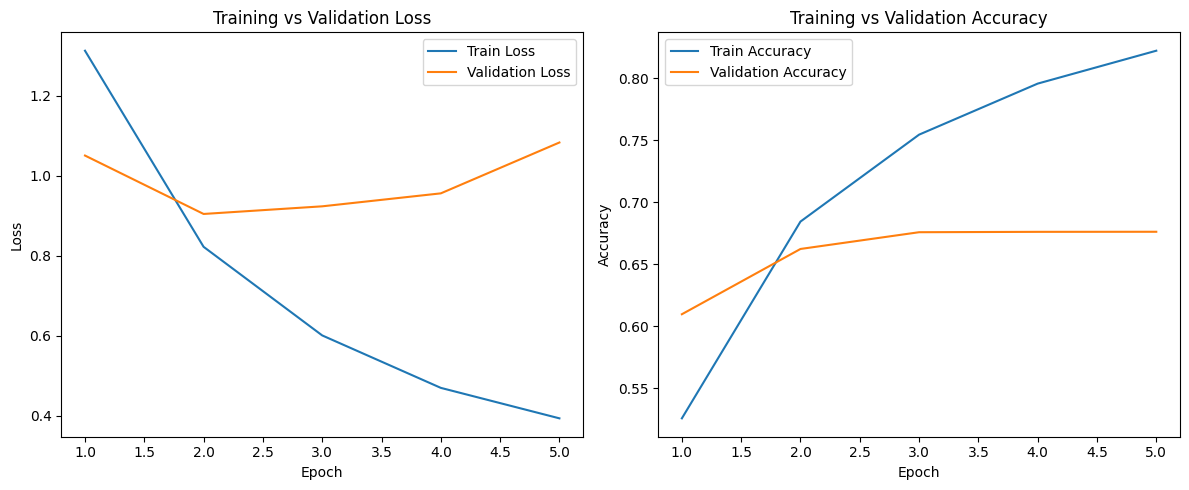

Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Punjabi/19149.mp3: frames must be specified for non-seekable files


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=915
  warnings.warn(


Error loading /kaggle/input/audio-dataset-with-10-indian-languages/Language Detection Dataset/Gujarati/18532.mp3: frames must be specified for non-seekable files


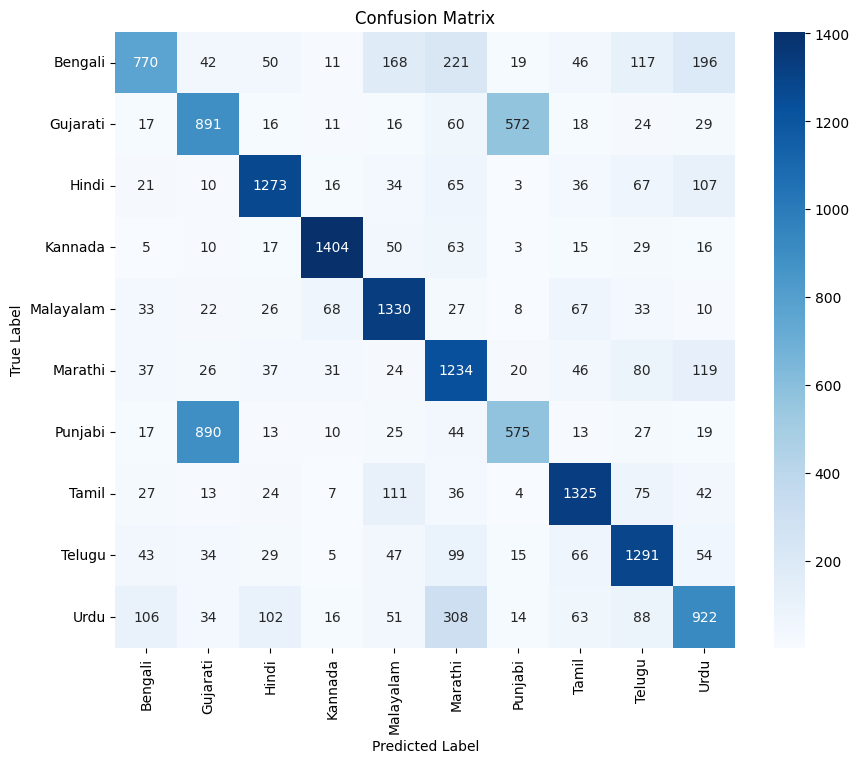

In [7]:
print(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork(n_mfcc=13, num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

patience = 3
best_val_loss = np.inf
patience_counter = 0

# Lists to record metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    train_loss = running_loss / total
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    
    val_loss = val_loss / total_val
    val_acc = correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    
    print(f"Epoch {epoch+1}/{num_epochs}: "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

epochs = np.arange(1, len(train_losses) + 1)


plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

class_names = dataset.languages

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()